<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/OUtlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('housePrice.csv')

In [4]:
print(data.head())

  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


<Axes: >

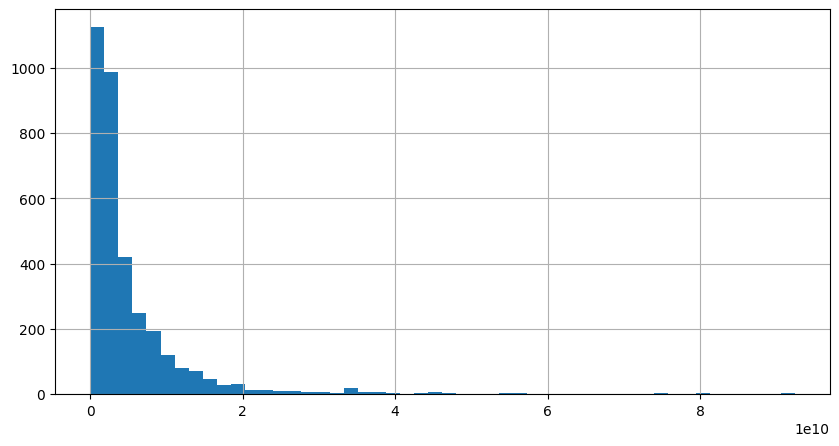

In [5]:

data['Price'].hist(bins=50, figsize=(10,5))

In [ ]:
X = data['Price'].values
X = X.reshape(len(X))
data2 = data[data['Price'].between(np.percentile(X,5), np.percentile(X,95), inclusive=True )]

In [ ]:
bins = np.arange(2,5,1)
data2['Price'].hist(bins=bins, figsize=(10,5))

In [ ]:
pip install pyod

In [34]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

<Axes: >

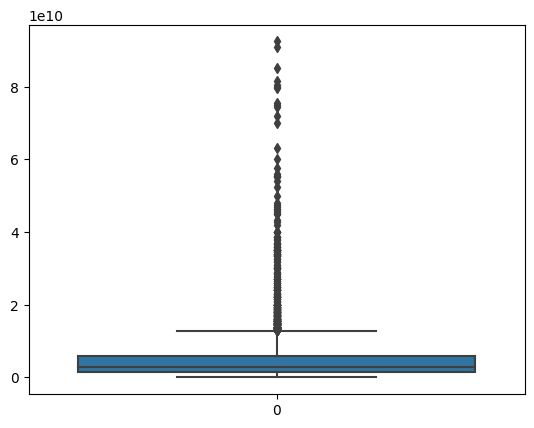

In [37]:
import seaborn as sns
sns.boxplot(data['Price'])

In [38]:
print(np.where(data['Price']>1.5))

(array([   0,    1,    2, ..., 3476, 3477, 3478]),)


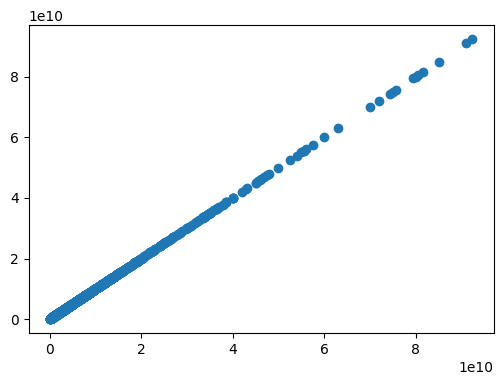

In [39]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(data['Price'],data['Price'])

In [40]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data['Price']))
print(z)

0       0.433278
1       0.433278
2       0.593797
3       0.550272
4       0.202621
          ...   
3474    0.229544
3475    0.177925
3476    0.616640
3477    0.029755
3478    0.617257
Name: Price, Length: 3479, dtype: float64


In [45]:
threshold = 2

In [46]:
print(np.where(z > 2))

(array([ 160,  161,  190,  201,  227,  265,  271,  330,  339,  340,  345,
        348,  349,  352,  411,  413,  430,  431,  440,  459,  464,  497,
        515,  516,  517,  526,  548,  560,  565,  568,  579,  583,  628,
        639,  642,  653,  743,  795,  819,  831,  875,  879, 1008, 1024,
       1025, 1119, 1141, 1153, 1180, 1233, 1263, 1270, 1275, 1312, 1323,
       1332, 1349, 1350, 1355, 1357, 1359, 1366, 1407, 1408, 1415, 1425,
       1426, 1427, 1428, 1488, 1531, 1545, 1546, 1551, 1565, 1587, 1635,
       1650, 1694, 1707, 1723, 1726, 1768, 1810, 1827, 1854, 1863, 1871,
       1916, 1919, 1920, 1931, 1984, 1993, 2178, 2194, 2236, 2274, 2275,
       2331, 2368, 2370, 2371, 2372, 2375, 2394, 2395, 2476, 2532, 2598,
       2689, 2693, 2706, 2722, 2779, 2850, 2960, 3051, 3107, 3111, 3184,
       3193, 3243, 3254, 3334, 3394]),)


In [43]:
Q1 = np.percentile(data['Price'], 25, method='midpoint')
Q3 = np.percentile(data['Price'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

4581750000.0


In [47]:
upper=Q3+1.5*IQR
upper_array=np.array(data['Price']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

Upper Bound: 12872625000.0
310


In [48]:
lower=Q1-1.5*IQR
lower_array=np.array(data['Price']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Lower Bound: -5454375000.0
0


In [58]:
sns.boxplot('z')

ValueError: ignored

In [50]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [51]:
upper_array = np.where(data['Price']>=upper)[0]
lower_array = np.where(data['Price']<=lower)[0]

In [53]:
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

In [54]:
print("New Shape: ", data.shape)

New Shape:  (3169, 8)


In [56]:
print("old Shape: ", data.shape)

old Shape:  (3169, 8)
